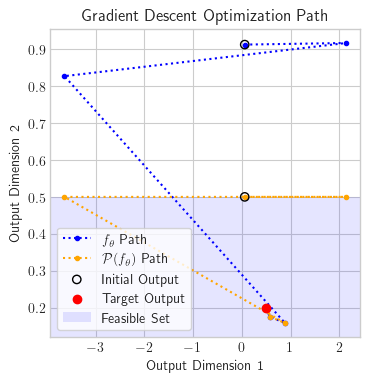

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import operator
from functools import reduce

matplotlib.rcParams['text.usetex'] = True
plt.style.use('seaborn-whitegrid')

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        input_dim = 1
        output_dim = 2
        hidden_size = 200
        layer_sizes = [input_dim, hidden_size, hidden_size]
        layers = reduce(operator.add,
            [[nn.Linear(a,b), nn.ReLU()]
                for a,b in zip(layer_sizes[0:-1], layer_sizes[1:])])
        layers += [nn.Linear(layer_sizes[-1], output_dim)]

        for layer in layers:
            if type(layer) == nn.Linear:
                nn.init.kaiming_normal_(layer.weight)

        self._net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self._net(x)
    
    def apply_projection(self, f, A, b):
        """project f to satisfy Af<=b"""
        return f - (torch.linalg.pinv(A) @ nn.ReLU()(A @ f[:,:,None] - b[:,:,None]))[:,:,0]

def calc_Ab(x, boundary):
    batch_size = x.size(dim=0)
    A = torch.tensor([[0.0, 1.0]])
    A = A.repeat(batch_size, 1, 1)
    b = torch.tensor([boundary])
    b= b.repeat(batch_size, 1)
    return A, b

# Seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Initialize the neural network, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Define a single training sample
input_sample = torch.tensor([[0.0]])  # Input is 1D
target_output = torch.tensor([[0.5, 0.2]])  # Target is 2D
boundary = 0.5

# Initialize a list to store outputs during training
outputs = []
outputs_proj = []

# Perform training
num_iterations = 20
for i in range(num_iterations):
    optimizer.zero_grad()
    output = model(input_sample)
    A, b = calc_Ab(input_sample, boundary)
    output_proj = model.apply_projection(output, A, b)
    loss = criterion(output_proj, target_output)
    loss.backward()
    optimizer.step()
    outputs.append(output.detach().numpy().flatten())
    outputs_proj.append(output_proj.detach().numpy().flatten())

# Convert outputs to a NumPy array for visualization
outputs = np.array(outputs)
outputs_proj = np.array(outputs_proj)

# Visualize the gradient descent optimization
plt.figure(figsize=(4, 4))
plt.plot(outputs[:, 0], outputs[:, 1], marker='o', markersize=3, color='blue', ls=':', label=r'$f_\theta$ Path')
plt.scatter(outputs[0, 0], outputs[0, 1], facecolors='none', edgecolors='k', zorder=5)
plt.plot(outputs_proj[:, 0], outputs_proj[:, 1], marker='o', markersize=3, color='orange', ls=':', label=r'$\mathcal{P}(f_\theta)$ Path')
plt.scatter(outputs_proj[0, 0], outputs_proj[0, 1], facecolors='none', edgecolors='k', label=r'Initial Output', zorder=5)
plt.scatter(target_output[0, 0].item(), target_output[0, 1].item(), color='red', label=r'Target Output', zorder=5)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.fill_between(xlim, ylim[0], boundary, color='b', alpha=0.1, edgecolor='none', label='Feasible Set')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('Output Dimension 1')
plt.ylabel('Output Dimension 2')
plt.title('Gradient Descent Optimization Path')
plt.legend(frameon='true')
plt.grid(True)
# plt.xlim([-10,10])
# plt.ylim([-5,5])
plt.show()

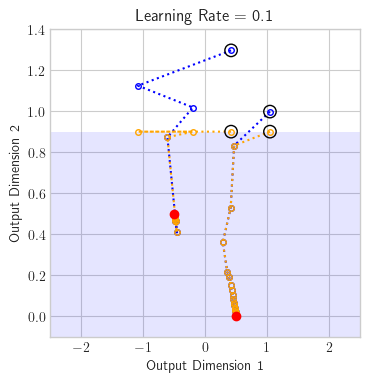

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import operator
from functools import reduce

matplotlib.rcParams['text.usetex'] = True
plt.style.use('seaborn-whitegrid')

# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        input_dim = 1
        output_dim = 2
        hidden_size = 10
        layer_sizes = [input_dim, hidden_size, hidden_size]
        layers = reduce(operator.add,
            [[nn.Linear(a,b), nn.ReLU()]
                for a,b in zip(layer_sizes[0:-1], layer_sizes[1:])])
        layers += [nn.Linear(layer_sizes[-1], output_dim)]

        for layer in layers:
            if type(layer) == nn.Linear:
                nn.init.kaiming_normal_(layer.weight)

        self._net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self._net(x)
    
    def apply_projection(self, f, A, b):
        """project f to satisfy Af<=b"""
        return f - (torch.linalg.pinv(A) @ nn.ReLU()(A @ f[:,:,None] - b[:,:,None]))[:,:,0]

def calc_Ab(x, boundary):
    batch_size = x.size(dim=0)
    A = torch.tensor([[0.0, 1.0]])
    A = A.repeat(batch_size, 1, 1)
    b = torch.tensor([boundary])
    b= b.repeat(batch_size, 1)
    return A, b

# Seed for reproducibility
torch.manual_seed(12)
np.random.seed(12)

# Initialize the neural network, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
lr = 0.1
optimizer = optim.SGD(model.parameters(), lr=lr)

# Define a single training sample
input_sample = torch.tensor([[-1.],[1.]])  # Input is 1D
target_output = torch.tensor([[-.5, .5],
                              [.5, 0.]])  # Target is 2D
# input_sample = input_sample[0:1]
# target_output = target_output[0:1]
boundary = .9

# Initialize a list to store outputs during training
outputs = []
outputs_proj = []

# Perform training
num_iterations = 100
A, b = calc_Ab(input_sample, boundary)
for i in range(num_iterations):
    optimizer.zero_grad()
    output = model(input_sample)
    output_proj = model.apply_projection(output, A, b)
    loss = criterion(output_proj, target_output)
    loss.backward()
    optimizer.step()
    outputs.append(output.detach().numpy())
    outputs_proj.append(output_proj.detach().numpy())

# Convert outputs to a NumPy array for visualization
outputs = np.array(outputs)
outputs_proj = np.array(outputs_proj)

# Visualize the gradient descent optimization
fig = plt.figure(figsize=(4, 4))
for idx_input in range(len(input_sample)):
    plt.plot(outputs[:, idx_input, 0], outputs[:, idx_input, 1], marker='o', fillstyle='none', markersize=4, color='blue', ls=':', label=r'$f_\theta$ Path')
    plt.scatter(outputs[0, idx_input, 0], outputs[0, idx_input, 1], facecolors='none', edgecolors='k', s=80, zorder=5)
    plt.plot(outputs_proj[:, idx_input, 0], outputs_proj[:, idx_input, 1], marker='o', fillstyle='none', markersize=4, color='orange', ls=':', label=r'$\mathcal{P}(f_\theta)$ Path')
    plt.scatter(outputs_proj[0, idx_input, 0], outputs_proj[0, idx_input, 1], facecolors='none', edgecolors='k', s=80, label=r'Initial Output', zorder=5)
    plt.scatter(target_output[idx_input, 0].item(), target_output[idx_input, 1].item(), color='red', label=r'Target Output', zorder=5)
# xlim = plt.gca().get_xlim()
# ylim = plt.gca().get_ylim()
xlim, ylim = [-2.5, 2.5], [-0.1, 1.4]
plt.fill_between(xlim, ylim[0], boundary, color='b', alpha=0.1, edgecolor='none', label='Feasible Set')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('Output Dimension 1')
plt.ylabel('Output Dimension 2')
plt.title(f'Learning Rate = {lr}')
# plt.legend(frameon='true')
plt.grid(True)
plt.show()
# fig.savefig(f'results/figures/gd_two_lr{lr}.pdf',dpi=300, bbox_inches='tight')